## Análisis lluvias

In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [10]:
data = pd.read_csv("data/INTA_Rafaela/luvias_mensuales.csv", sep=";")

In [11]:
data.tail()

Año  Enero  Febrero  Marzo  Abril   Mayo  Junio  Julio  Agosto  \
49  2019  194.9     52.8   59.5  127.2   70.3   19.9   38.3     9.3   
50  2020  127.5    126.5  129.9   45.2   15.7   10.6    2.3     0.0   
51  2021  298.6     38.0  109.8  106.3   43.1    8.2   10.5     1.6   
52  2022  130.3     57.4  176.5   19.8    0.3    2.6    6.3    16.3   
53  2023   70.9     63.5  225.8   27.8  120.6    4.4   11.5     0.0   

    Septiembre  Octubre  Noviembre  Diciembre  
49        64.7     32.7      110.5      143.4  
50        18.9     47.6      108.9       49.3  
51        27.8     77.6      152.0       36.1  
52        35.0     42.5       66.6       53.9  
53         1.0     28.6      198.3      148.0

In [12]:
x = data.Año
data.drop("Año", axis=1, inplace=True)
fig_mapa_lluvia = px.imshow(data.T, color_continuous_scale='inferno_r', origin='lower', aspect="auto", x=x)

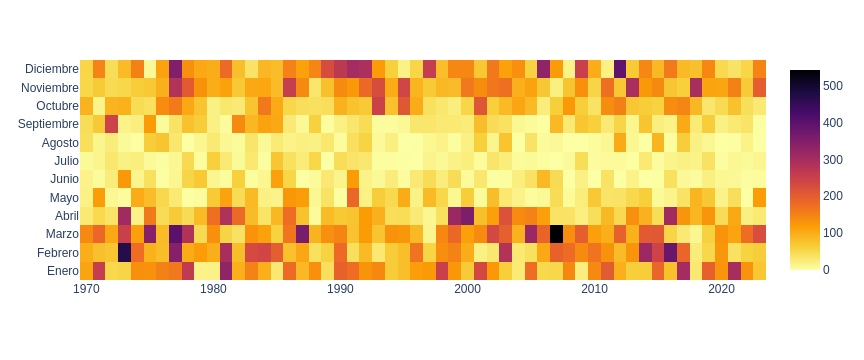

In [13]:
fig_mapa_lluvia.show()

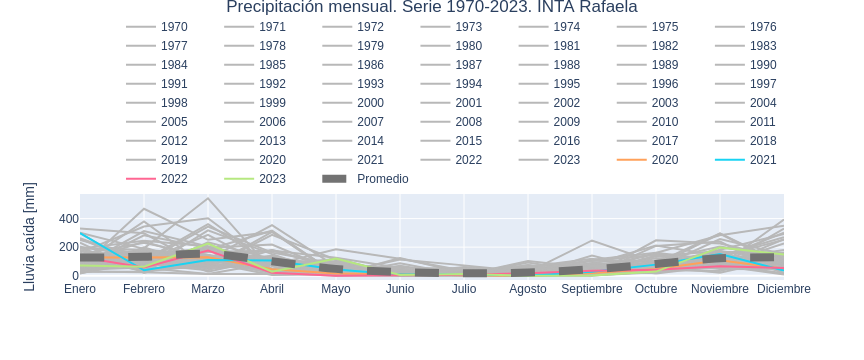

In [14]:
fig = go.Figure()


x = data.columns
promedios = data.describe().loc["mean",:].values
# ['linear', 'hv', 'vh', 'hvh', 'vhv']
for i, anio in enumerate(range(1970, 2024)):
    y = data.loc[i, :].values
    fig.add_trace(go.Scatter(x=x, y=y, name=f"{anio}", mode="lines", line=dict(color="#b8b8b8")))
    
#for i, anio in enumerate(range(2019,2024)):
#    y = data.loc[i, :].values
#    fig.add_trace(go.Scattergl(x=x, y=y, name=f"{anio}", mode="lines"))
    
    
y = data.loc[50, :].values
fig.add_trace(go.Scatter(x=x, y=y, name=f"2020", mode="lines", ))
y = data.loc[51, :].values
fig.add_trace(go.Scatter(x=x, y=y, name=f"2021", mode="lines", ))
y = data.loc[52, :].values
fig.add_trace(go.Scatter(x=x, y=y, name=f"2022", mode="lines", ))
y = data.loc[53, :].values
fig.add_trace(go.Scatter(x=x, y=y, name=f"2023", mode="lines", ))

fig.add_trace(go.Scatter(x=x, y=promedios, name=f"Promedio", mode="lines", line=dict(shape="spline", width=8, dash="dash", color="#727272")))
fig.update_layout(height=800)
fig.update_layout(yaxis_title="Lluvia caída [mm]",
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_layout(
    title={
        'text': "Precipitación mensual. Serie 1970-2023. INTA Rafaela",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


In [15]:
data['total_anual'] = data.sum(axis=1)

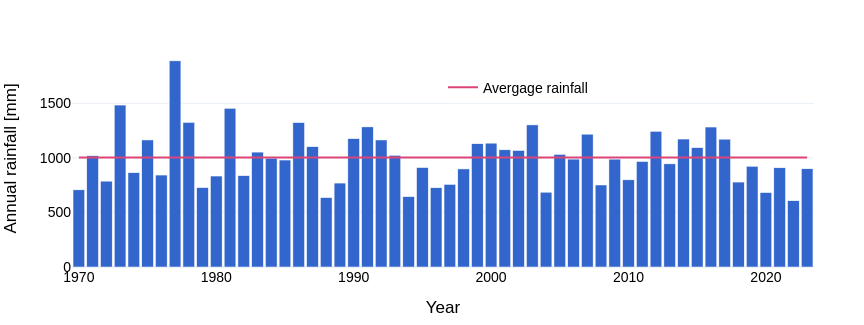

In [16]:
fig = px.bar(data, x=list(range(1970,2024)), y="total_anual", color_discrete_sequence=['#3366CC'])
fig.add_trace(go.Scatter(x=list(range(1970,2024)), y=[data.total_anual.mean()]*(2023-1970+1), name="Avergage rainfall", mode="lines", line=dict(color='#DD4477', width=2)))
fig.update_layout(xaxis_title="Year", yaxis_title="mm", template="plotly_white", height=1.3*250, width=1000)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Annual rainfall [mm]',
    font=dict(
        #family='Arial',  # Tipografía
        size=14,  # Tamaño de fuente
        color='black'  # Color de fuente
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Color de fondo del gráfico
    paper_bgcolor='rgba(0,0,0,0)',  # Color de fondo del papel
    barmode='group',  # Modo de las barras
    bargap=0.15,  # Espacio entre las barras
    margin=dict(l=50, r=50, t=50, b=50),  # Márgenes del gráfico
    legend=dict(x=0.5, y=0.9, orientation='h')
)

### Convierto datos en serie mensual
- armo datos de lluvia en una lista
- armo datos de las fechas correpondientes en otra lista
- ardmo dataframe con eso para graficar luego en notebook de tesis

In [40]:
lluvias = []
for i in range(1970,2024):
    lluvias += data.iloc[i-1970,:-1].to_list()

In [41]:
fechas = []
for yyyy in range(1970,2024):
    fechas += [f"{yyyy}-{str(mm).zfill(2)}-01" for mm in range(1,13)]

In [44]:
lluvia_mensual = {"fecha":fechas, "lluvia":lluvias}
data_lluvia_mensual = pd.DataFrame(lluvia_mensual)

In [45]:
data_lluvia_mensual.head()

fecha  lluvia
0  1970-01-01   109.9
1  1970-02-01    98.3
2  1970-03-01   142.4
3  1970-04-01    29.4
4  1970-05-01    17.9

In [48]:
data_lluvia_mensual.to_csv("data/INTA_Rafaela/lluvias_mensual_procesada_tesis.csv", index=False)